<a href="https://colab.research.google.com/github/CindyMG/Core-II-Wk-4/blob/main/Core_II_W4_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [ ]:
#importing our libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Loading our dataset



In [ ]:
#for this project, we will be using the Titanic dataset: http://bit.ly/TitanicTrainDataset

#The columns and their descriptions are as shown below:
# Survived - Survival (0 = No; 1 = Yes)
# Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# Name - Name
# Sex - Sex
# Age - Age
# SibSp - Number of Siblings/Spouses Aboard
# Parch - Number of Parents/Children Aboard
# Ticket - Ticket Number
# Fare - Passenger Fare (British pound)
# Cabin - Cabin
# Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
#let us load the dataset
train = pd.read_csv('/content/train.csv')
#preview the first five records
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#checking the number or rows and columns in our dataset
train.shape
# 891 rows and 12 columns! 

(891, 12)

In [ ]:
#let us get some more details concerning our dataset - shape, data types etc.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#DATA CLEANING & EXPLORATORY DATA ANALYSIS

##Removing null values

In [ ]:
#finding and removing null or missing values
#finding out the sum of null values in each column
train.isnull().sum()

#all the columns have no missing values except 'Age' and 'Cabin'
# 'Cabin' has way too many null values and it will not be very relevant for our analysis so we can just drop the whole column
# The 'Age' column however, seems to be an important variable so we will have to find a different approach to get rid of the null values
# 'Embarked' has only 2 null values so when the time comes to drop them, 
#we can comfortably drop them without worrying about compromising the accuracy of our dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#as we are dropping the 'cabin' column, we might as well drop other columns that may not be of much help to our study
titanic = train.drop(['PassengerId','Name','Ticket','Cabin'], 1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#checking and dropping any duplicates in our dataset
titanic.drop_duplicates(subset=None, keep='first', inplace=True)

#let us check how many records we have left after removing duplicates
titanic.shape
#only a slight difference in rows, we can move on!

(780, 8)

##Collinearity

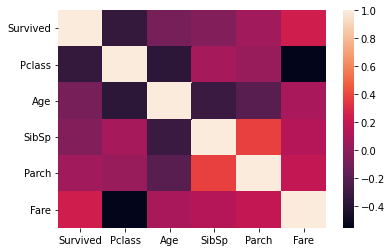

In [ ]:
#checking the correlation between the variables
sns.heatmap(titanic.corr()) 

# we can see how some variables have strong correlations - such as 'Fare' and 'Pclass' (the higher the class, the more the fare)
# others are 'Age' and 'Pclass' , 'Survived' and 'Pclass' etc.

##Bivariate analysis/ data cleaning

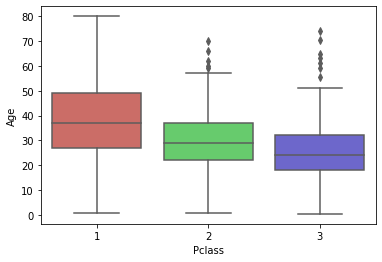

In [ ]:
# now, we want to handle the null values in the 'Age' column
# dropping the entire column is unwise because 'Age' seems like an important variable and dropping 177 null values is completely out of question!
# so, how do we go about this?
# we are going to use the variable 'Pclass' to help us out a little bit
# Let's look at how passenger age is related to their class as a passenger on the boat.
# 
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='hls')

# although it is a weak correlation, we can see that Pclass and Age are negatively correlated;
# younger passengers appear to be in the 3rd class while older passengers seem to be in the former classes
# let us try checking the average ages of all 3 classes: 1st class - 38, 2nd class - 30, 3rd class - 25

In [ ]:
# Write a function that finds each null value in the 'Age' variable, 
#For each null value, it checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.
#
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

##Removing the remaining null values

In [ ]:
# Call the function.
#
titanic['Age'] = titanic[['Age', 'Pclass']].apply(age_approx, axis=1)
# now, check whether all the null values in 'Age' have been replaced
titanic.isnull().sum()
#Great! Now let us drop those 2 null values in 'Embarked'
titanic.dropna(inplace=True)
titanic.isnull().sum()
#No null values left! 

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

##Univariate analysis

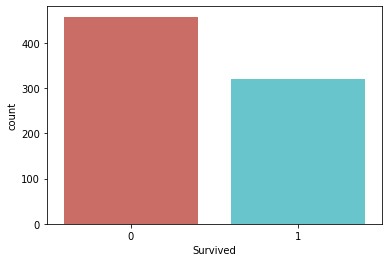

In [ ]:
# let us pick one variable to analyze, 'Survived'
# we are going to use a countplot to compare the number of those who survived(1) and those who perished(0)

sns.countplot(x='Survived',data=titanic, palette='hls')

# clearly from the visualization above, we can see that the number of passengers who perished is higher than those who survived

##Encoding categorical variables using dummies

In [ ]:
# We need to convert the 'Sex' and 'Embarked' variables into numerical variables.
# =
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
sex.head()

# male - 1, female - 0

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
# just for a bit of context, Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
embarked = pd.get_dummies(titanic['Embarked'],drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
#let us review the original dataset
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# now, we will drop the 'sex' and 'embarked' columns and concatenate the new columns we made after creating the dummies
titanic.drop(['Sex', 'Embarked'],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
# assign a new variable for the dataset after concatenation
titanic1 = pd.concat([titanic,sex,embarked],axis=1)
titanic1.head()

# Now the categorical data variables have been converted into numerical format!

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#K-Nearest Neighbour Classifier

## Using an 80% - 20% ratio

In [ ]:
#let us define our X and y variables
X = titanic1.drop("Survived",axis=1)
y = titanic1["Survived"]

#import the train test split libraries
from sklearn.model_selection import train_test_split

#split the data into 80% training and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# Feature Scaling
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training and predictions
#
# import the KNN classifier libraries
from sklearn.neighbors import KNeighborsClassifier

# now, we will choose n_neighbours, or basically the value of K - 5 is the most commonly used one
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# The final step is to make predictions on our test data
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluation
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 

#importing the confusion matrix libraries
from sklearn.metrics import classification_report, confusion_matrix

#displaying the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[78 10]
 [22 46]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        88
           1       0.82      0.68      0.74        68

    accuracy                           0.79       156
   macro avg       0.80      0.78      0.79       156
weighted avg       0.80      0.79      0.79       156



**Confusion matrix:** Our ***true negative***(number of people who died in the crash) is 78; only seventy eight perished cases out of the total were correctly predicted. 

Our ***true positive***(number of survivors) is 46; only 46 survived cases out of the total were correctly predicted. 

We can see that the precision score for 0(perished) is 78% while that of 1(survived) is 80%. The general ***accuracy score*** of this model is **79%** - not bad, but it shows that this model is not that good.

## Using a 70% - 30% ratio

In [ ]:
# we had initially split the data into 80% training and 20% test data
# what if we change the ratio?
# let us try creating a new model but now splitting the data into 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
# Feature Scaling
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training and predictions
#
# import the KNN classifier libraries
from sklearn.neighbors import KNeighborsClassifier

# now, we will choose n_neighbours, or basically the value of K - 5 is the most commonly used one
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# The final step is to make predictions on our test data
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluation
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 

#importing the confusion matrix libraries
from sklearn.metrics import classification_report, confusion_matrix

#displaying the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[107  19]
 [ 32  76]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       126
           1       0.80      0.70      0.75       108

    accuracy                           0.78       234
   macro avg       0.78      0.78      0.78       234
weighted avg       0.78      0.78      0.78       234



**Confusion matrix:** Our ***true negative***(number of people who died in the crash) is 107; one hundred and seven perished cases out of the total were correctly predicted.

Our ***true positive***(number of survivors) is 76; only 76 survived cases out of the total were correctly predicted. 

We can see that the precision score for 0(perished) is 77% - a slight decrease from the previous model; while that of 1(survived) is 80% - a slight decrease from the previous model. The general ***accuracy score*** of this model is **78%** - a slightly lower score than the previous model.

Not much has changed, right? Let us try a different approach.

## Changing the n-neighbours

In [ ]:
# now, we will choose n_neighbours, or basically the value of K - 3 
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# The final step is to make predictions on our test data
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluation
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 

#importing the confusion matrix libraries
from sklearn.metrics import classification_report, confusion_matrix

#displaying the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[106  20]
 [ 35  73]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       126
           1       0.78      0.68      0.73       108

    accuracy                           0.76       234
   macro avg       0.77      0.76      0.76       234
weighted avg       0.77      0.76      0.76       234



**Confusion matrix:** Our ***true negative***(number of people who died in the crash) is 106; one hundred and six perished cases out of the total were correctly predicted.

Our ***true positive***(number of survivors) is 73; only 73 survived cases out of the total were correctly predicted. 

We can see that the precision score for 0(perished) is 75% - a slight decrease from the previous models; while that of 1(survived) is 78% - similar to the previous model. The general ***accuracy score*** of this model is **76%** - a slightly lower score than the previous models.

Changing the n-neighbours from 5 to 3, seems to have lowered 